In [2]:
from misid_model import *
from scipy.optimize import minimize
import numdifftools as nd
from utility_commonPlot import *

# 1. Perform Template Fit

In [21]:
baseDir = common.getBaseDirectory()
tag = 'VTightTauMisid'
X = np.load(baseDir + "data/templates_{}/shaping/X_.npy".format(tag))
XVar = np.load(baseDir + "data/templates_{}/shaping/XVar_.npy".format(tag))
Y = np.load(baseDir + "data/templates_{}/shaping/Y_.npy".format(tag))
model = PredictiveModel(X,splitJetFlavor=True)
model0 = PredictiveModel(X,splitJetFlavor=False)

# X += 0.001
# Y += 0.001

# def paramTransformToModel(param):
#     paramsf = np.ones(12)*param[0]
#     prarmtheta = param[1:]
#     paraminput = np.r_[paramsf,prarmtheta]
#     return paraminput

[ 1.00201524  1.1602231   1.39581073  0.95554603  0.86272906  0.74175916
  0.97030279  0.8759335   0.82453092  0.79587623  0.9193196   0.71058156
  0.05060279 -0.02146296  0.00749854 -0.58587298  0.58093499  0.25782781
  0.09888703 -0.98344204  1.04211534]
[0.14046826 0.14246194 0.14260147 0.13141328 0.1809661  0.2148084
 0.08753799 0.07516457 0.07193868 0.07883763 0.10176833 0.11518461
 0.95080376 0.99943803 0.99970291 0.74293652 0.74172033 0.99649634
 0.99217823 0.82658431 0.82931364]


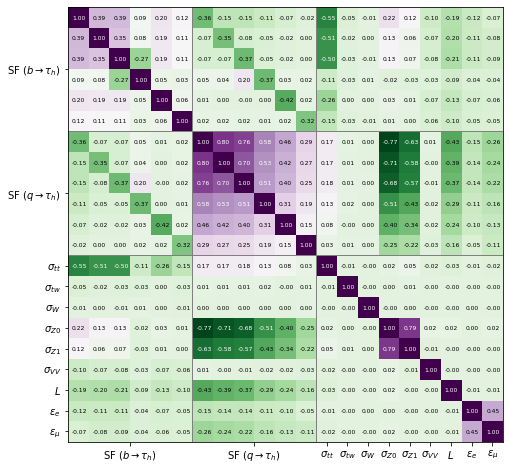

In [22]:
# split Jet Flavor
nsf,ntheta = 12, 7+2
def loss (param):
    #param = paramTransformToModel(param)
    y = model.predict(param)
    loss  = np.sum( (y-Y)**2/(2*(Y+XVar)) )
    #loss  = np.sum( (y-Y)**2/(2*Y) )
    #loss  = np.sum(Y*np.log(y) - y)
    loss += np.sum( (param[nsf:]**2)/2  )
    return loss

paramInit = np.array([1.]*nsf + [0]*ntheta)
result = minimize( loss, paramInit, method='SLSQP', bounds = [(0,2)]*nsf + [(-5,5)]*ntheta )

hcalc = nd.Hessian(loss, step=1e-4, method='central')
hess  = hcalc( result.x )
hessinv = np.linalg.inv(hess)
sig   = np.sqrt(hessinv.diagonal())
cor   = hessinv/np.outer(sig, sig)
loss0 = loss(result.x)

print(result.x)
print(sig)


ticksPos = [2.5,8.5,12,13,14,15,16,17,18,19,20]
ticksName = [r'SF $ (b \rightarrow \tau_h)$',
             r'SF $ (q \rightarrow \tau_h)$',
             r'$\sigma_{tt}$',
             r'$\sigma_{tw}$',
             r'$\sigma_{W}$',
             r'$\sigma_{Z0}$',
             r'$\sigma_{Z1}$',
             r'$\sigma_{VV}$',
             r'$L$',r'$\epsilon_e$',r'$\epsilon_\mu$',
            ]

plt.figure(figsize=(8,8),facecolor='w')
plt.imshow(cor,cmap='PRGn_r')
plt.axhline(5.5,color='gray',linewidth=1)
plt.axhline(11.5,color='gray',linewidth=1)
plt.axvline(5.5,color='gray',linewidth=1)
plt.axvline(11.5,color='gray',linewidth=1)



plt.xticks(ticksPos,ticksName)
plt.yticks(ticksPos,ticksName)
#plt.colorbar(shrink=0.8)

for i in range(cor.shape[0]):
    for j in range(cor.shape[1]):
        value = cor[i,j]
#         if abs(value)<0.2:
#             continue
        if abs(value)>0.5:
            fcolor = 'w'
        else:
            fcolor = 'k'
        plt.text(i-0.3,j+0.1,'{:4.2f}'.format(cor[i,j]),fontsize=6,color=fcolor )

plt.savefig('../../../plots/misid/corr2_{}_splitJetFlavor.png'.format(tag),dpi=300)

[ 1.00600797  0.94621802  0.94973143  0.88312401  0.8962082   0.70352489
  1.19559642 -0.002217    0.04718034 -1.38087971 -0.08500542  1.51942528
  0.40448192 -1.36488727  1.64606089]
[0.0566207  0.04740025 0.04401304 0.04129742 0.04393496 0.04208646
 0.74584417 0.99683661 0.99912333 0.52743416 0.57506072 0.98504532
 0.98834289 0.72952085 0.7429862 ]


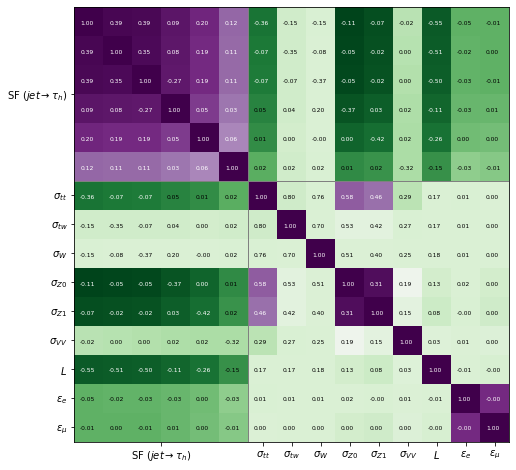

In [23]:
# combine Jet Flavor
nsf,ntheta = 6, 7+2
def loss0 (param):
    #param = paramTransformToModel(param)
    y = model0.predict(param)
    loss  = np.sum( (y-Y)**2/(2*Y) )
    #loss  = np.sum(Y*np.log(y) - y
    loss += np.sum( (param[nsf:]**2)/2  )
    return loss

paramInit = np.array([1.]*nsf + [0]*ntheta)
result0 = minimize( loss0, paramInit, method='SLSQP', bounds = [(0,2)]*nsf + [(-5,5)]*ntheta )

hcalc0 = nd.Hessian(loss0, step=1e-4, method='central')
hess0  = hcalc0( result0.x )
hessinv0 = np.linalg.inv(hess0)
sig0   = np.sqrt(hessinv0.diagonal())
cor0   = hessinv0/np.outer(sig0, sig0)
loss = loss0(result0.x)

print(result0.x)
print(sig0)

ticksPos = [2.5,6,7,8,9,10,11,12,13,14]
ticksName = [r'SF $ (jet \rightarrow \tau_h)$',
             r'$\sigma_{tt}$',
             r'$\sigma_{tw}$',
             r'$\sigma_{W}$',
             r'$\sigma_{Z0}$',
             r'$\sigma_{Z1}$',
             r'$\sigma_{VV}$',
             r'$L$',r'$\epsilon_e$',r'$\epsilon_\mu$',
            ]

plt.figure(figsize=(8,8),facecolor='w')
plt.imshow(cor0,cmap='PRGn_r')
plt.axhline(5.5,color='gray',linewidth=1)
#plt.axhline(11.5,color='gray',linewidth=1)
plt.axvline(5.5,color='gray',linewidth=1)
#plt.axvline(11.5,color='gray',linewidth=1)


plt.xticks(ticksPos,ticksName)
plt.yticks(ticksPos,ticksName)
#plt.colorbar(shrink=0.8)

for i in range(cor0.shape[0]):
    for j in range(cor0.shape[1]):
        value = cor0[i,j]
#         if abs(value)<0.2:
#             continue
        if abs(value)>0.5:
            fcolor = 'w'
        else:
            fcolor = 'k'
        plt.text(i-0.3,j+0.1,'{:4.2f}'.format(cor[i,j]),fontsize=6,color=fcolor )

plt.savefig('../../../plots/misid/corr2_{}_combineJetFlavor.png'.format(tag),dpi=300)

# 2. Plot Post-fit Templates

In [24]:
param_opt = result.x
#param_opt = paramTransformToModel(result.x)

temp = np.concatenate(model.predict(param_opt,True),axis=1)
targ = np.concatenate(Y,axis=0)
# separate processes
mctt = np.sum(temp[0:5],axis=0)
mct  = np.sum(temp[5:10],axis=0)
mcw  = np.sum(temp[10:15],axis=0)
mcz  = np.sum(temp[15:20],axis=0)
mcvv = np.sum(temp[20:25],axis=0)

mclist = [mcvv,mcz,mcw,mct,mctt]

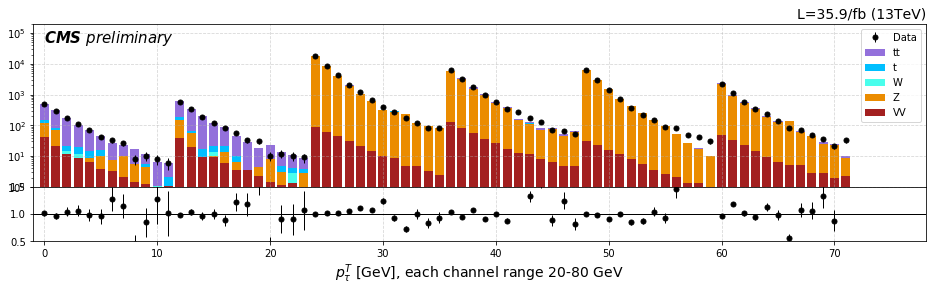

In [25]:
colorList = ["#a32020","#eb8c00","#49feec","deepskyblue","mediumpurple"]
labelList = ["VV","Z","W","t","tt"]
chList = common.channelLsit()


fig, axes = plt.subplots(2, 1, sharex=True, facecolor='w',
                         gridspec_kw={'height_ratios':[3,1]},
                         figsize=(16,4))
fig.subplots_adjust(hspace=0)


c = np.arange(targ.size)
accum = np.zeros(targ.size)

# making plot

ax = axes[0]
for i in range(len(mclist)):
    height = mclist[i]
    ax.bar(c, height, bottom=accum, width=0.8, alpha=1, color=colorList[i],label=labelList[i])
    accum += height
ax.errorbar(c, targ,yerr=targ**0.5, c='k', fmt='.',markersize=10,lw=1, label='Data')
ax.grid(True,linestyle="--",alpha=0.5)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])
ax.set_yscale('log')
ax.set_ylim(1,2e5)
ax.text(0, 5e4, r'CMS $preliminary$',style="italic",fontsize="15",fontweight='bold')
ax.set_title("L=35.9/fb (13TeV)",loc="right",fontsize=14)

ax = axes[1]
ax.errorbar(c, targ/accum, yerr=targ**0.5/accum, c='k', fmt='.',markersize=10,lw=1)
ax.grid(True,linestyle="--",alpha=0.5)
ax.axhline(1,lw=1,color='k')
ax.set_ylim(0.5,1.5)
ax.set_xlim(c.min()-1., 1.1*c.max())
ax.set_xlabel(r'$p^T_\tau$ [GeV], each channel range 20-80 GeV',fontsize=14)

plt.savefig('../../../plots/misid/tauID_postfit_{}.png'.format(tag),dpi=300)

# Show the fitting Results

In [26]:
ptpos = np.array([22.5,27.5,35,45,57.5,72.5])
ptwid = np.array([2.5,2.5,5,5,7.5,7.5])

c_sf = result.x[:12].reshape(2,6)
s_sf = sig[:12].reshape(2,6)


c_sfjet = result0.x[:6]
s_sfjet = sig0[:6]
# c_sfjet = array([1.01831573, 0.96135078, 0.9429135 , 0.88707892, 0.93013478, 0.70739701])
# s_sfjet = array([0.05479143, 0.04606   , 0.04338468, 0.04102377, 0.04481317,0.04184311])

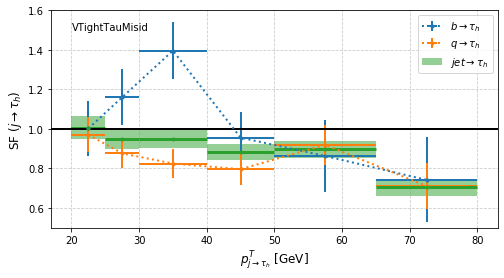

In [27]:
plt.figure(figsize=(8,4),facecolor='w')

plt.errorbar(ptpos,c_sf[0],xerr=ptwid,yerr=s_sf[0],
             fmt='.:', lw=2, color='C0',alpha=1,
             label=r'$b \rightarrow \tau_h$')
plt.errorbar(ptpos,c_sf[1],xerr=ptwid,yerr=s_sf[1],
             fmt='.:', lw=2, color='C1',alpha=1,
             label=r'$q \rightarrow \tau_h$')

plt.bar(ptpos,2*s_sfjet,bottom=c_sfjet-s_sfjet,width=2*ptwid,
        color='C2',alpha=0.5,
        label=r'$jet \rightarrow \tau_h$')

plt.errorbar(ptpos,c_sfjet,xerr=ptwid,
             fmt='.', lw=3, color='C2',alpha=1)



plt.axhline(1,color='k',linewidth=2)

plt.grid(linestyle='--',color='grey',alpha=0.4)
plt.legend()
plt.xlabel(r'$p^T_{j\rightarrow \tau_h}$ [GeV]',fontsize=12)
plt.ylabel(r'SF $ (j\rightarrow \tau_h)$',fontsize=12)
plt.ylim([0.5,1.6])
plt.text(20,1.5,tag)
plt.savefig('../../../plots/misid/fit_ptflavor_{}.png'.format(tag),dpi=300)

In [28]:
d = {'bin_pT1': ptpos - ptwid, 
     'bin_pT2': ptpos + ptwid,
     'SF_b2MisID':c_sf[0],
     'SF_q2MisID':c_sf[1],
     'SF_j2MisID':c_sfjet,
     'sigma_SF_b2MisID':s_sf[0],
     'sigma_SF_q2MisID':s_sf[1],
     'sigma_SF_j2MisID':s_sfjet
    }
df = pd.DataFrame(data=d)
df.to_csv('../../../data/templates_{}/SF_misID.csv'.format(tag))

In [29]:
print('b -> tau')
for i in range(6):
    print(' & ${:4.2f}\pm{:4.2f}$'.format(c_sf[0,i],s_sf[0,i]), end='')

print(' ')
print('q -> tau')
for i in range(6):
    print(' & ${:4.2f}\pm{:4.2f}$'.format(c_sf[1,i],s_sf[1,i]), end='')

print(' ')
print('jet -> tau')
for i in range(6):
    print(' & ${:4.2f}\pm{:4.2f}$'.format(c_sfjet[i],s_sfjet[i]), end='')

b -> tau
 & $1.00\pm0.14$ & $1.16\pm0.14$ & $1.40\pm0.14$ & $0.96\pm0.13$ & $0.86\pm0.18$ & $0.74\pm0.21$ 
q -> tau
 & $0.97\pm0.09$ & $0.88\pm0.08$ & $0.82\pm0.07$ & $0.80\pm0.08$ & $0.92\pm0.10$ & $0.71\pm0.12$ 
jet -> tau
 & $1.01\pm0.06$ & $0.95\pm0.05$ & $0.95\pm0.04$ & $0.88\pm0.04$ & $0.90\pm0.04$ & $0.70\pm0.04$

In [45]:
c_sf.T

array([[1.00201524, 0.97030279],
       [1.1602231 , 0.8759335 ],
       [1.39581073, 0.82453092],
       [0.95554603, 0.79587623],
       [0.86272906, 0.9193196 ],
       [0.74175916, 0.71058156]])

21

In [46]:
a = array([23105.0,23040.0,46342.0,694.0,717.0,1420.0,5260.0,5158.0,9727.0,8199.0,8029.0,30054.0,8163.0,8006.0,29970.0,290101.0,289467.0,50864.0,50050.0,187515.0,904067.0])
#a = array([1811409.0,1811532.0,3620281.0,57056.0,54227.0,111124.0,418128.0,407605.0,763147.0,642646.0,626108.0,2350887.0,643368.0,627277.0,2353727.0,22670017.0,22653517.0,4016590.0,3923503.0,14718934.0,70930278.0])

In [47]:
hh = a[20]
lh = a[15:20]
ll = a[0:15]

In [51]:
( (sum(ll)+sum(ll)**0.5 )/sum(a))**0.5/3 - (sum(ll)/sum(a))**0.5/3

0.00011838152307137861

In [50]:
(sum(ll)/sum(a))**0.5/3

0.10800960689158423